In [1]:
"""
Used for ploting csv data
"""

'\nUsed for ploting csv data\n'

In [5]:
# imports
import time
import datetime
import pandas as pd

In [6]:
# Read in csv's
list_of_csv = [
    # 'full_data__6__2017.csv', # don't use 2017 data, its not great
    'full_data__6__2018.csv',
    'full_data__6__2019.csv',
    'full_data__6__2020.csv',
    'full_data__6__2021.csv'
]
sorted_list_of_csv = [
    'sorted_full_data_2018.csv',
    'sorted_full_data_2019.csv',
    'sorted_full_data_2020.csv',
    'sorted_full_data_2021.csv'
]
# Start: '1/1/2018'
# End: '10/5/2021'

In [7]:
# Test if csv are sorted
for csv in list_of_csv:
    data = pd.read_csv(f'csv_files\{csv}')
    sorted_data = data.sort_values(by=['timestamp'])
    print(f'{csv} is sorted?: {data.equals(sorted_data)}')
    # The above resulted in 
    # full_data__6__2018.csv is sorted?: True
    # full_data__6__2019.csv is sorted?: False
    # full_data__6__2020.csv is sorted?: False
    # full_data__6__2021.csv is sorted?: False
    # So we have to sort the data (only do this once)
    
    # Test for nulls
    null_counts = sorted_data[['timestamp', 'Open', 'Close']].isnull().sum()
    null_counts[null_counts > 0].sort_values(ascending=False)
    print(null_counts)
    # No nulls!

    # create 'price' column from avg of Open and Close
    sorted_data['price'] = (sorted_data['Open']+sorted_data['Close'])/2
    # Give the index a name for the csv
    sorted_data.index.names = ['index']
    # drop all columns we don't want
    sorted_data = sorted_data.filter(['index', 'timestamp', 'price'])
    
    # Only run this once
    # sorted_data.to_csv(f'csv_files\sorted_{csv}')

# Spacing
print('\nSorted check:')

# Show that sorted data is sorted
for csv in sorted_list_of_csv:
    data = pd.read_csv(f'csv_files\{csv}')
    sorted_data = data.sort_values(by=['timestamp'])
    print(f'{csv} is sorted?: {data.equals(sorted_data)}')


full_data__6__2018.csv is sorted?: True
timestamp    0
Open         0
Close        0
dtype: int64
full_data__6__2019.csv is sorted?: False
timestamp    0
Open         0
Close        0
dtype: int64
full_data__6__2020.csv is sorted?: False
timestamp    0
Open         0
Close        0
dtype: int64
full_data__6__2021.csv is sorted?: False
timestamp    0
Open         0
Close        0
dtype: int64
sorted_full_data_2018.csv is sorted?: True
sorted_full_data_2019.csv is sorted?: True
sorted_full_data_2020.csv is sorted?: True
sorted_full_data_2021.csv is sorted?: True


In [8]:
# Create arbitrary plot
def create_time_period(start, end, name):
    """
    Loops through csv until time > start and continue until end < time.
    If the end of a file is reached, open the next one.
    Save the resulting data as a new csv called 'name.csv'
    """
    start = int(time.mktime(datetime.datetime.strptime(start, "%m/%d/%Y").timetuple()))
    print(f'Start timestamp: {start}')
    end = int(time.mktime(datetime.datetime.strptime(end, "%m/%d/%Y").timetuple()))
    print(f'End timestamp: {start}')
    new_df = pd.DataFrame(columns=['timestamp','price'])

    for csv in sorted_list_of_csv:
        # read data in
        data = pd.read_csv(f'csv_files\{csv}')
        end_time_of_csv = data['timestamp'].iloc[-1]
        # Check if end_of_csv_time < start: go to next csv
        if end_time_of_csv < start:
            continue
        # Add all rows that are between start and end to new_df
        new_df = new_df.append(
            data.loc[
                (data['timestamp'] > start) &
                (data['timestamp'] < end)
            ], ignore_index=True
        )
        # check if end_of_csv_time > end: stop collecting data
        if end_time_of_csv > end:
            break
    
    print(new_df)
    # Save df as csv
    if not new_df.empty:
        new_df.to_csv(f'csv_files\{name}.csv')

In [9]:
create_time_period('1/1/2018','10/5/2021', 'everything')

Start timestamp: 1514782800
End timestamp: 1514782800
          timestamp        price     index
0        1514782860   746.698750     300.0
1        1514782920   746.666250     301.0
2        1514782980   746.648750     302.0
3        1514783040   746.786250     303.0
4        1514783100   746.213333     304.0
...             ...          ...       ...
1976669  1633406100  3386.710000  468186.0
1976670  1633406160  3387.605000  468187.0
1976671  1633406220  3386.580000  468188.0
1976672  1633406280  3385.340000  468189.0
1976673  1633406340  3386.545000  468190.0

[1976674 rows x 3 columns]


Start datetime: 2018-01-02 08:01:00
End datetime:   2018-01-05 07:59:00


<AxesSubplot:xlabel='timestamp'>

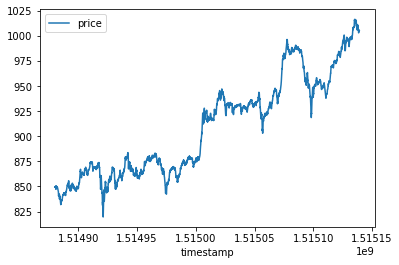

In [11]:
# Recalibrate time variable in a new row to start at 0
# start_time = data['Time'].values[0]
# data['Cal Time'] = data['Time'].apply(lambda x: x - start_time)

# Examples
# Plot data returned
# By default x=index
# data.plot(y='To #', kind='line')
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line')
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line', xlim=(35000,45000))
# data.plot(x='Cal Time', y=['To #', 'Plus .3%', 'Minus .3%'], kind='line', ylim=(data['To #'].mean()*(1-.005),data['To #'].mean()*(1+.005)))

data = pd.read_csv(f'csv_files\\test.csv', index_col='index')
start_datetime = pd.to_datetime(data['timestamp'].iloc[0], unit='s')
end_datetime = pd.to_datetime(data['timestamp'].iloc[-1], unit='s')
print(f'Start datetime: {start_datetime}')
print(f'End datetime:   {end_datetime}')
data.plot(x='timestamp', y='price', kind='line')

sorted_full_data_2018.csv
Start datetime: 2018-01-01 00:01:00
End datetime:   2018-12-31 23:59:00
sorted_full_data_2019.csv
Start datetime: 2019-01-01 00:01:00
End datetime:   2019-12-31 23:59:00
sorted_full_data_2020.csv
Start datetime: 2020-01-01 00:01:00
End datetime:   2020-12-31 23:59:00
sorted_full_data_2021.csv
Start datetime: 2021-01-01 00:01:00
End datetime:   2021-11-26 23:43:00


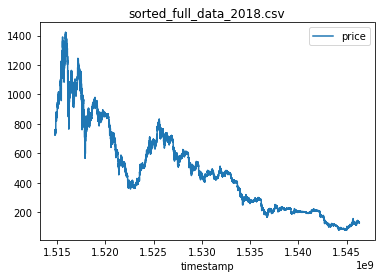

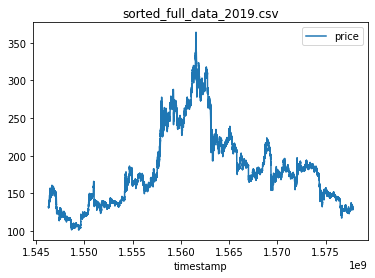

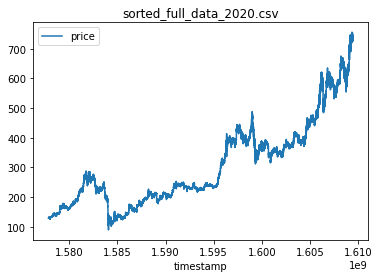

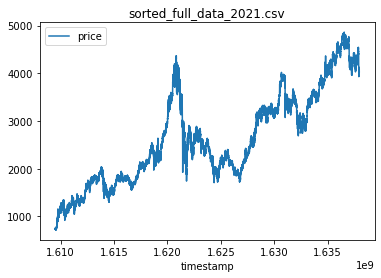

In [12]:
# Plots
for csv in sorted_list_of_csv:
    print(csv)
    data = pd.read_csv(f'csv_files\\{csv}', index_col='index')
    start_datetime = pd.to_datetime(data['timestamp'].iloc[0], unit='s')
    end_datetime = pd.to_datetime(data['timestamp'].iloc[-1], unit='s')
    print(f'Start datetime: {start_datetime}')
    print(f'End datetime:   {end_datetime}')
    data.plot(x='timestamp', y='price', title=csv, kind='line')

everything.csv


C:\Users\kiwid\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Start datetime: 2018-01-01 05:01:00
End datetime:   2021-10-05 03:59:00


<AxesSubplot:title={'center':'everything.csv'}, xlabel='timestamp'>

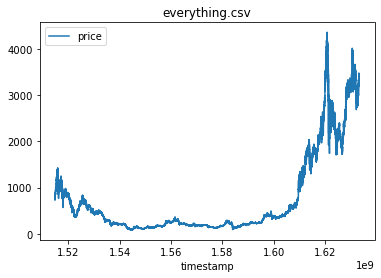

In [13]:
csv = 'everything.csv'
print(csv)
data = pd.read_csv(f'csv_files\\{csv}', index_col='index')
start_datetime = pd.to_datetime(data['timestamp'].iloc[0], unit='s')
end_datetime = pd.to_datetime(data['timestamp'].iloc[-1], unit='s')
print(f'Start datetime: {start_datetime}')
print(f'End datetime:   {end_datetime}')
data.plot(x='timestamp', y='price', title=csv, kind='line')